In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df_Trends = pd.read_csv("../data/external/EcommerceTrends/ecommerce_product_dataset2.csv")
df_customerSegmentation = pd.read_csv("../data/external/Customer Segmentation/customer_segmentation_data.csv")
df_WallmartSales = pd.read_csv("../data/external/Walmart Sales/Walmart_Sales.csv")

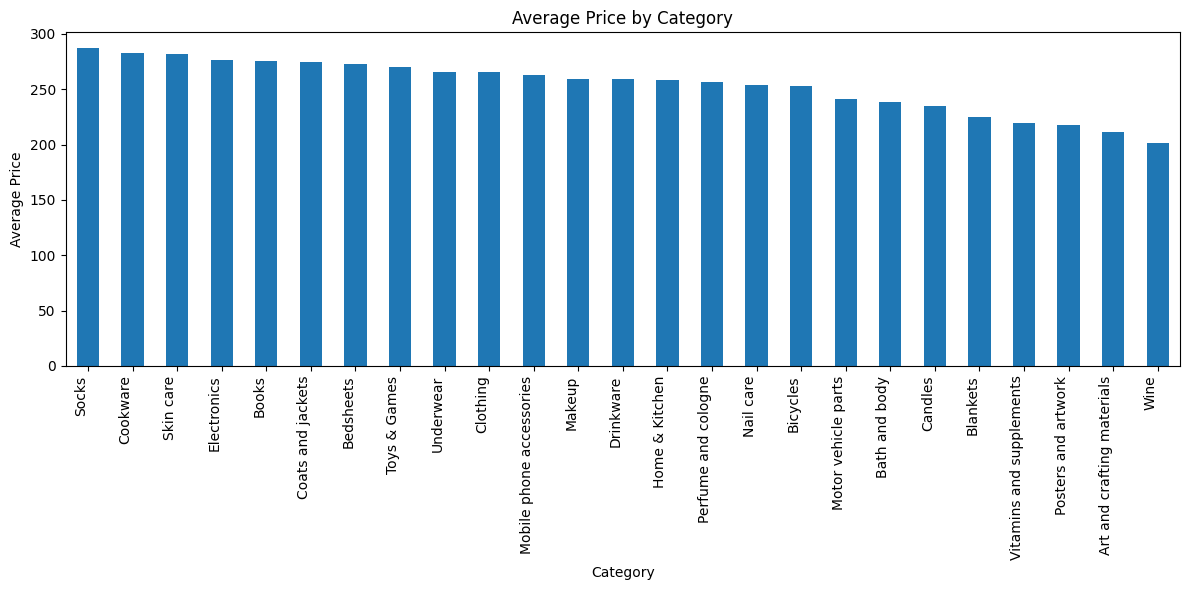

In [34]:
#1. Bar plot of average price by category (df_Trends)
plt.figure(figsize=(12, 6))
df_Trends.groupby('Category')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

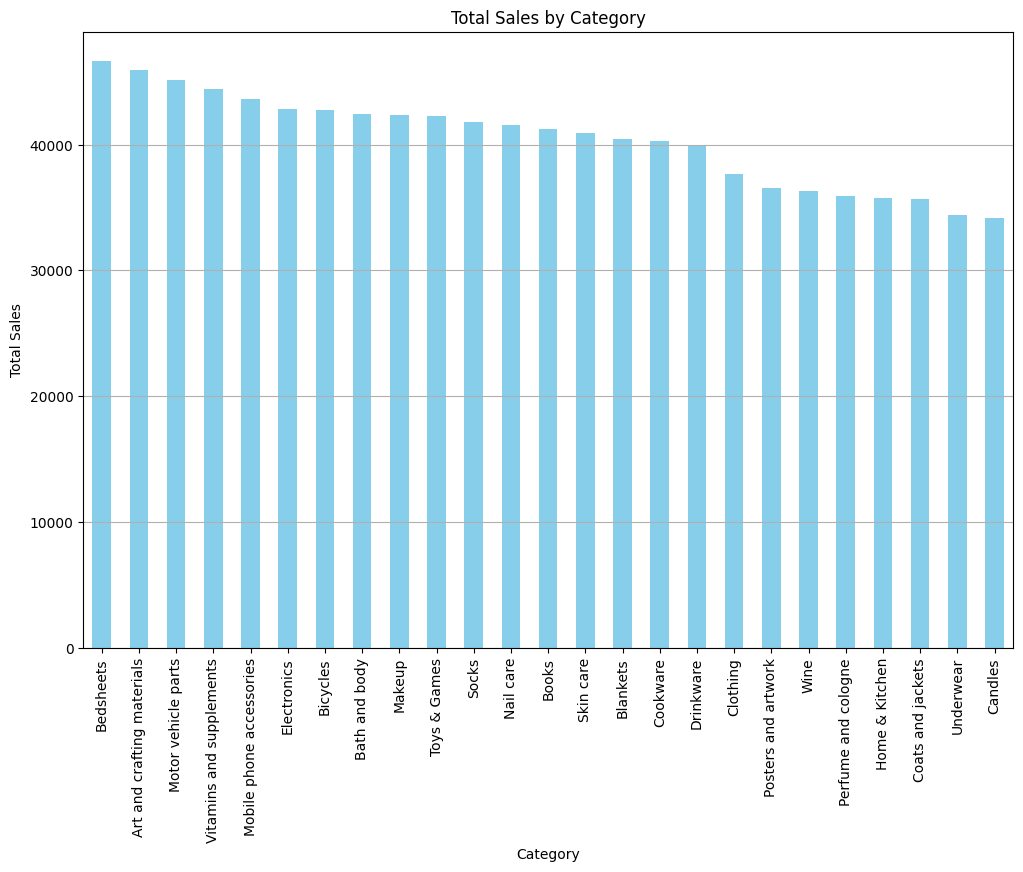

In [33]:
#2. plot for Sales by Category
sales_by_category = df_Trends.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


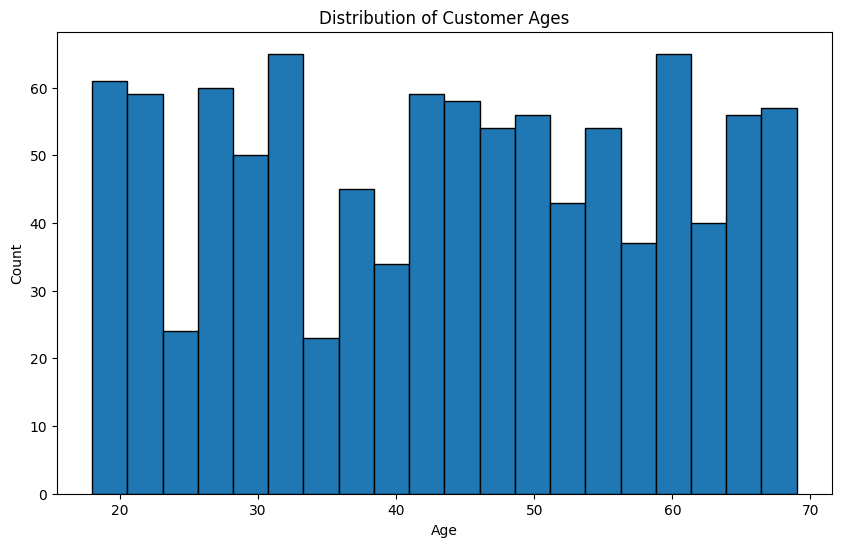

In [9]:
# 3. Histogram of customer ages (df_customerSegmentation)
plt.figure(figsize=(10, 6))
plt.hist(df_customerSegmentation['age'], bins=20, edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

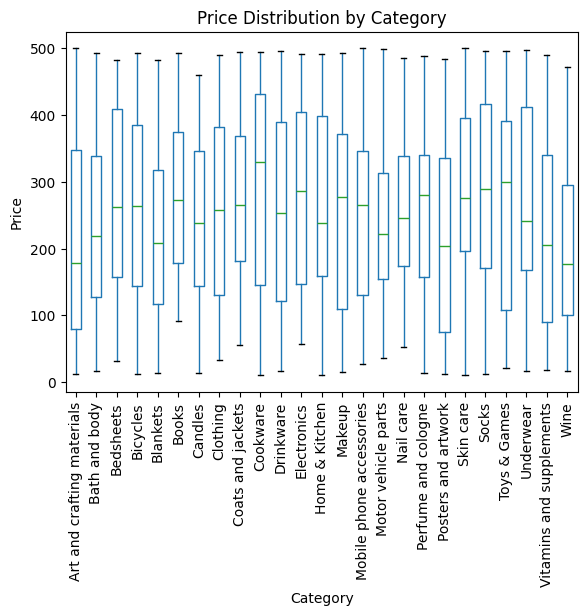

In [32]:
#4.  plot Price Distribution by Category
plt.figure(figsize=(12, 8))
df_Trends.boxplot(column='Price', by='Category', grid=False)
plt.title('Price Distribution by Category')
plt.suptitle('')  # Suppress the automatic title to avoid overlap
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

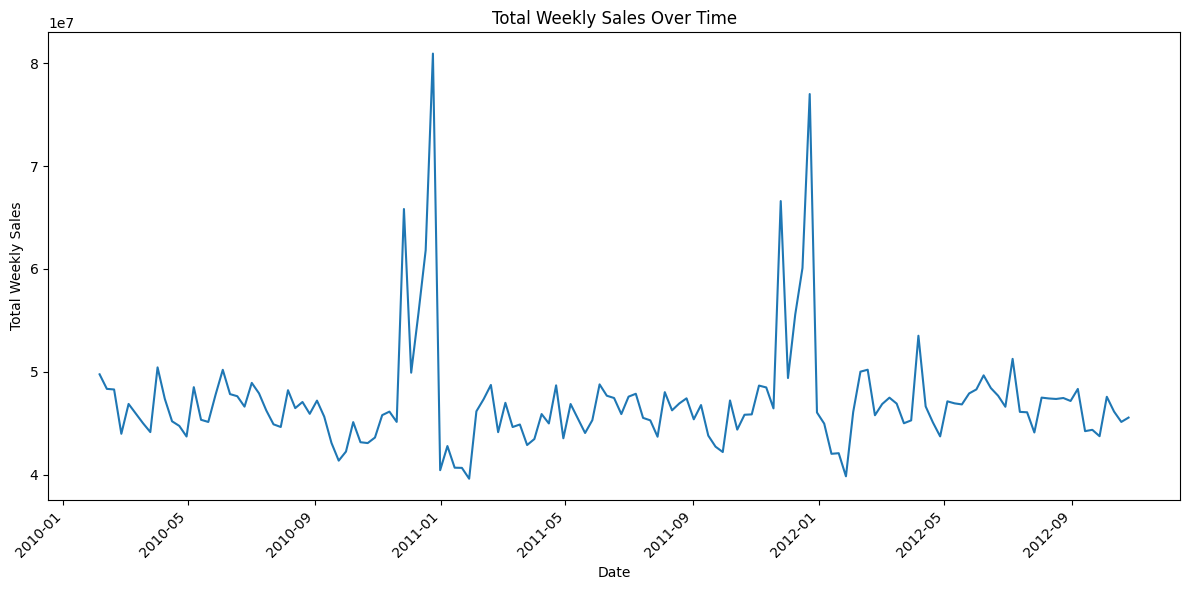

In [17]:
df_WallmartSales['Date'] = pd.to_datetime(df_WallmartSales['Date'], format='%d-%m-%Y')
weekly_sales = df_WallmartSales.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\lemon\AppData\Local\Temp\ipykernel_18388\1374316986.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_age_counts = df_customerSegmentation.groupby(['age_group', 'preferred_category']).size().unstack()


<Figure size 1400x800 with 0 Axes>

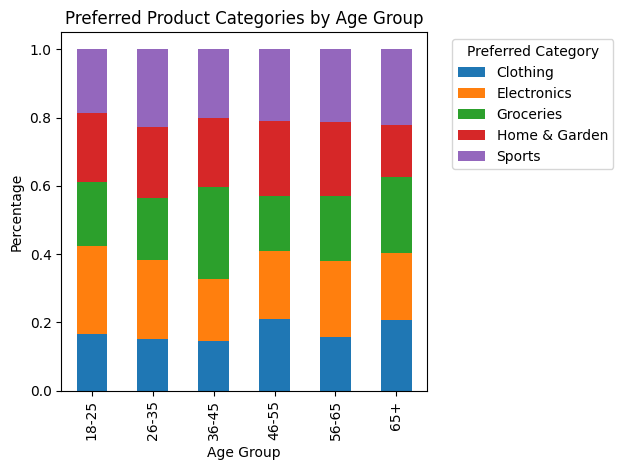

In [20]:
# 6. Stacked bar chart of preferred categories by age group
df_customerSegmentation['age_group'] = pd.cut(df_customerSegmentation['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
category_age_counts = df_customerSegmentation.groupby(['age_group', 'preferred_category']).size().unstack()
category_age_percentages = category_age_counts.div(category_age_counts.sum(axis=1), axis=0)
plt.figure(figsize=(14, 8))
category_age_percentages.plot(kind='bar', stacked=True)
plt.title('Preferred Product Categories by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Preferred Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

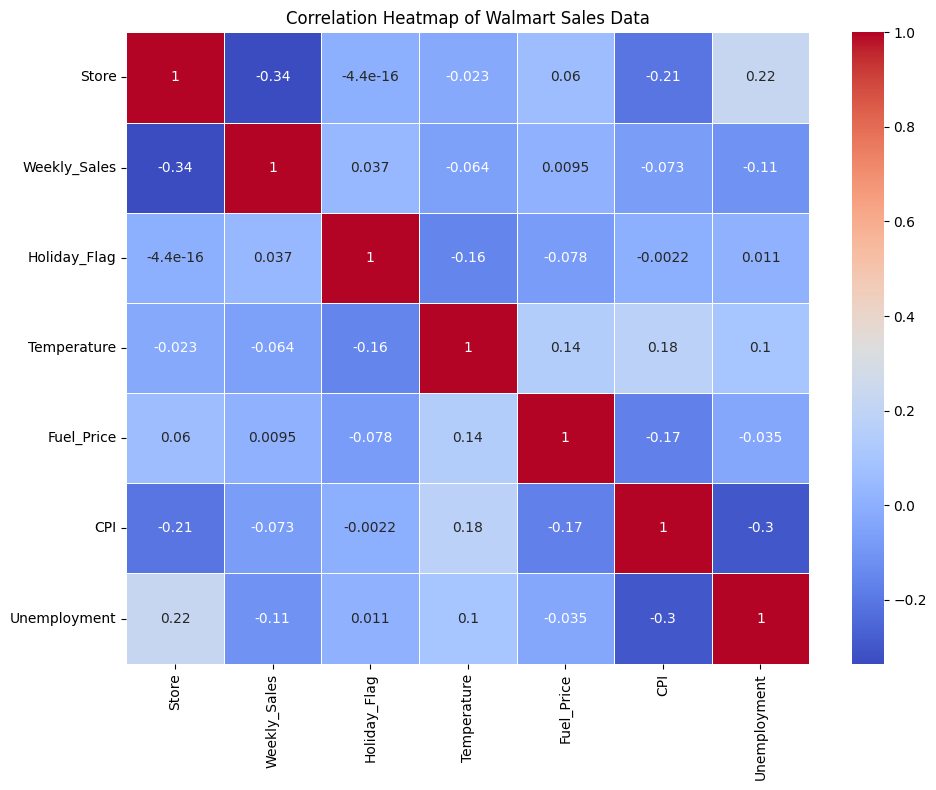

'\nshows the relationships between different numerical variables in the Walmart Sales dataset.\nEach cell in the heatmap displays the correlation coefficient between two variables, \nranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). \nThis visualization helps identify strong positive or negative correlations between variables, \nsuch as how store number might be negatively correlated with sales,\nor how unemployment might have a weak negative correlation with weekly sales. This information can guide further analysis and decision-making.'

In [35]:
# 7. Correlation heatmap for df_WallmartSales
import numpy as np
numeric_columns = df_WallmartSales.select_dtypes(include=[np.number]).columns
correlation_matrix = df_WallmartSales[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Walmart Sales Data')
plt.tight_layout()
plt.show()
'''
shows the relationships between different numerical variables in the Walmart Sales dataset.
Each cell in the heatmap displays the correlation coefficient between two variables, 
ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). 
This visualization helps identify strong positive or negative correlations between variables, 
such as how store number might be negatively correlated with sales,
or how unemployment might have a weak negative correlation with weekly sales. This information can guide further analysis and decision-making.'''